<a href="https://colab.research.google.com/github/AZIMNIYAZ/Covid-Policy-Analyzer/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")

print("Original dataset shape:", df.shape)
print("Columns:", df.columns)

# Keep only rows where Location mentions India
df_india = df[df['Location'].str.contains("India", case=False, na=False)]

print("Filtered dataset shape (India only):", df_india.shape)

# Quick check of some rows
print(df_india[['Location','OriginalTweet','Sentiment']].head(10))


Original dataset shape: (41157, 6)
Columns: Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')
Filtered dataset shape (India only): (1192, 6)
                 Location                                      OriginalTweet  \
185                 India  Stock market corrections\r\r\nCurrency rate co...   
272  Rangia, Assam, India  What #CONVID19 safety measures r being taken b...   
294   Bhubaneshwar, India  The Food Supplies and Consumer Welfare departm...   
333          Patna, India  Stockup on compassion &amp; love\r\r\nNot tiss...   
385         Mumbai, India  With all due Respect to @PMOIndia @narendramod...   
402         Punjab, India  shopkeepers who are selling mask at very highl...   
428      New Delhi, India  @RMantri Yeah, imagine that.\r\r\n\r\r\nEconom...   
430               Indiana  As this #coronavirus goes on or gets worse I d...   
436                 India  Are People Avoiding Online Shopping Portals Fr

Sentiment
Positive              346
Negative              296
Neutral               216
Extremely Positive    204
Extremely Negative    130
Name: count, dtype: int64


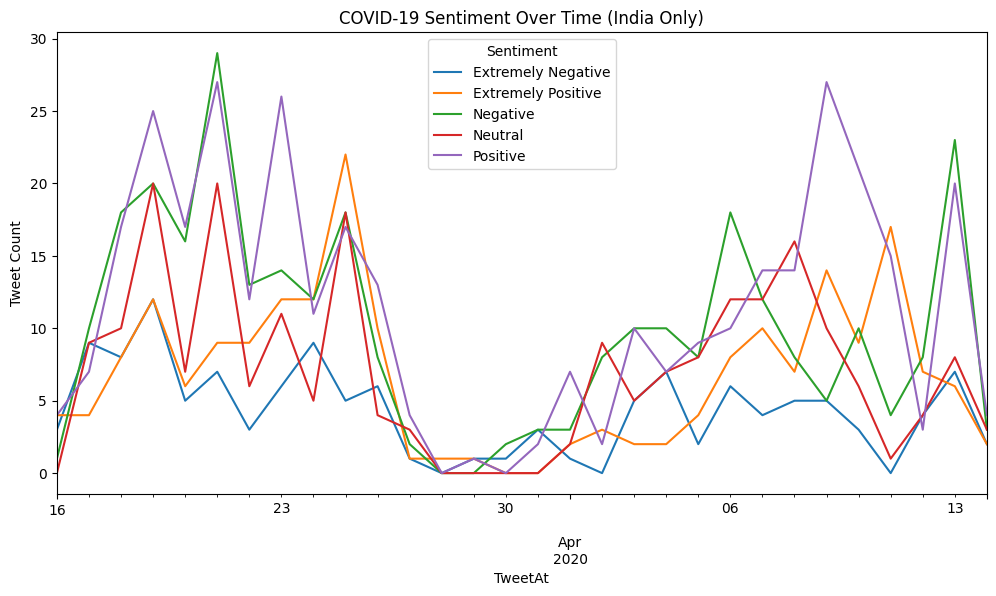

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")

# Filter India-only tweets (with .copy() to avoid warnings)
df_india = df[df['Location'].str.contains("India", case=False, na=False)].copy()

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_india['clean_text'] = df_india['OriginalTweet'].apply(clean_text)

# Sentiment distribution
print(df_india['Sentiment'].value_counts())

# Fix date parsing
df_india['TweetAt'] = pd.to_datetime(df_india['TweetAt'], dayfirst=True)

# Time-series sentiment trend
trend_india = df_india.groupby([df_india['TweetAt'], 'Sentiment']).size().unstack(fill_value=0)

# Plot
trend_india.plot(figsize=(12,6))
plt.title("COVID-19 Sentiment Over Time (India Only)")
plt.ylabel("Tweet Count")
plt.show()


Sentiment
Positive              346
Negative              296
Neutral               216
Extremely Positive    204
Extremely Negative    130
Name: count, dtype: int64


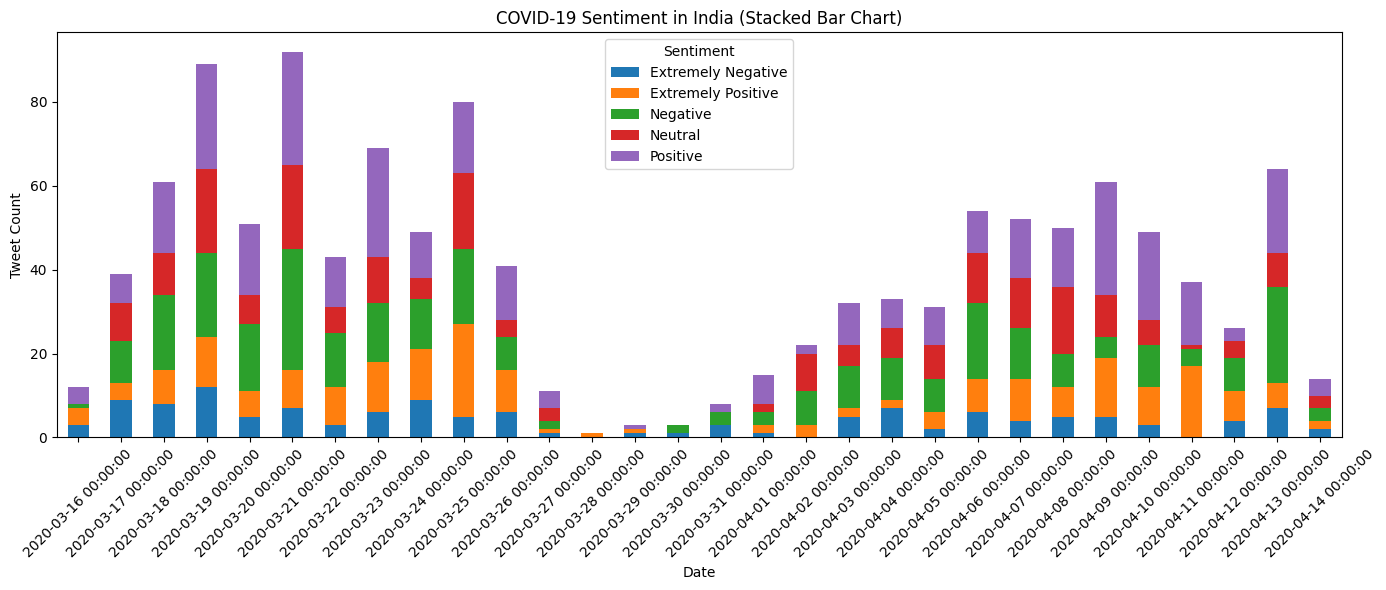

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding="latin1")

# Filter India-only tweets (with .copy() to avoid warnings)
df_india = df[df['Location'].str.contains("India", case=False, na=False)].copy()

# Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[^a-z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_india['clean_text'] = df_india['OriginalTweet'].apply(clean_text)

# Sentiment distribution
print(df_india['Sentiment'].value_counts())

# Fix date parsing
df_india['TweetAt'] = pd.to_datetime(df_india['TweetAt'], dayfirst=True)

# Group by day & sentiment
trend_india = df_india.groupby([df_india['TweetAt'], 'Sentiment']).size().unstack(fill_value=0)

# Plot as stacked bar chart
trend_india.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("COVID-19 Sentiment in India (Stacked Bar Chart)")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import re

# 1. Load dataset (from current working directory)
df = pd.read_csv("Corona_NLP_train.csv", encoding="latin1")

# 2. Filter India-only tweets (with .copy() to avoid warnings)
df_india = df[df['Location'].str.contains("India", case=False, na=False)].copy()

# 3. Clean text
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove links
    text = re.sub(r"@\w+", "", text)     # remove mentions
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # keep alphanumeric only
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_india['clean_text'] = df_india['OriginalTweet'].apply(clean_text)

# 4. Fix date parsing
df_india['TweetAt'] = pd.to_datetime(df_india['TweetAt'], dayfirst=True)

# 5. Save cleaned dataset (will appear in left Files panel)
output_path = "covid19_india_cleaned.csv"
df_india.to_csv(output_path, index=False)

print(f"✅ Cleaned India-only dataset saved as {output_path}")


✅ Cleaned India-only dataset saved as covid19_india_cleaned.csv


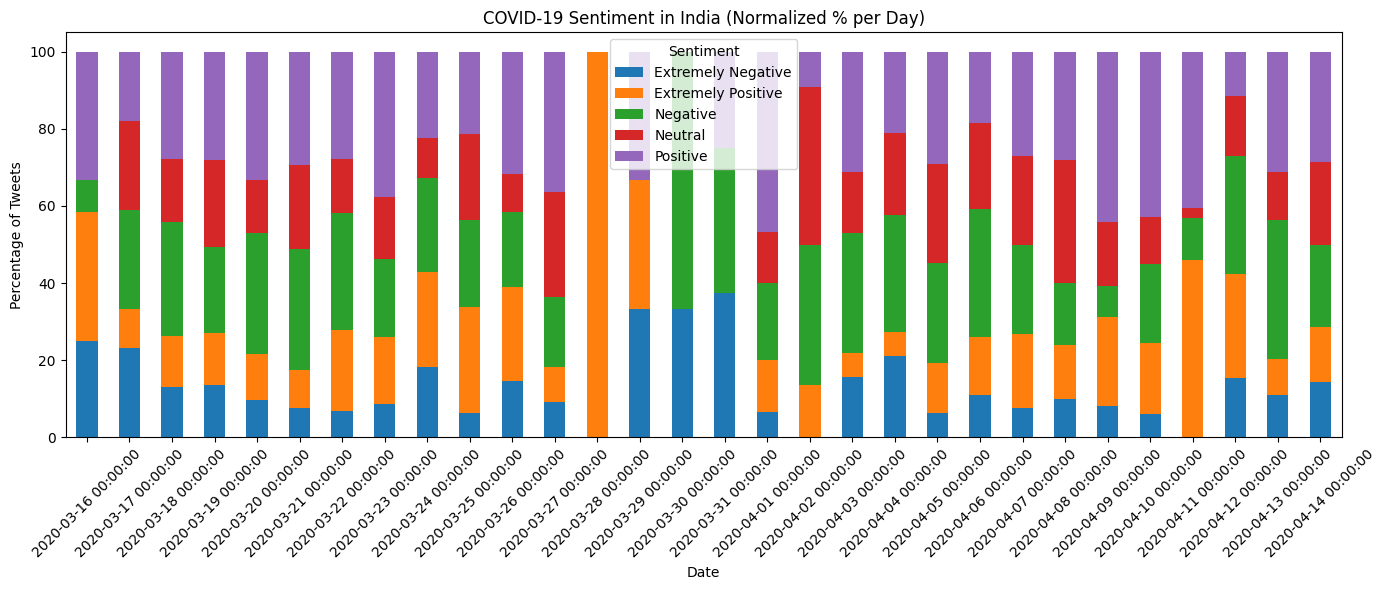

In [ ]:
import matplotlib.pyplot as plt

# Group by date & sentiment
trend_india = df_india.groupby([df_india['TweetAt'], 'Sentiment']).size().unstack(fill_value=0)

# Normalize to percentages
trend_india_pct = trend_india.div(trend_india.sum(axis=1), axis=0) * 100

# Plot normalized stacked bar chart
trend_india_pct.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("COVID-19 Sentiment in India (Normalized % per Day)")
plt.xlabel("Date")
plt.ylabel("Percentage of Tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


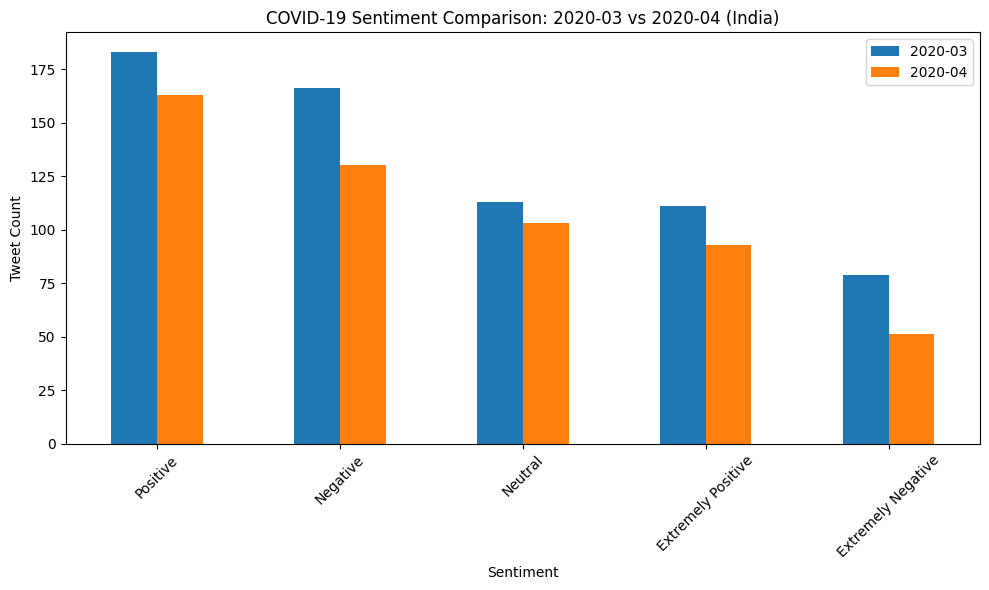

In [ ]:
import matplotlib.pyplot as plt

# Extract month & year from date
df_india['Month'] = df_india['TweetAt'].dt.to_period("M")

# Pick two months to compare (example: April 2020 vs May 2020)
month1 = "2020-03"
month2 = "2020-04"

# Sentiment counts for each month
sent_month1 = df_india[df_india['Month'] == month1]['Sentiment'].value_counts()
sent_month2 = df_india[df_india['Month'] == month2]['Sentiment'].value_counts()

# Combine into one DataFrame for comparison
compare_df = pd.DataFrame({
    month1: sent_month1,
    month2: sent_month2
}).fillna(0)

# Plot side-by-side bar chart
compare_df.plot(kind="bar", figsize=(10,6))
plt.title(f"COVID-19 Sentiment Comparison: {month1} vs {month2} (India)")
plt.ylabel("Tweet Count")
plt.xlabel("Sentiment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Using the compare_df we built earlier
report = []

for sentiment in compare_df.index:
    val1 = compare_df.loc[sentiment, month1]
    val2 = compare_df.loc[sentiment, month2]
    change = val2 - val1

    if change > 0:
        trend = f"increased by {change}"
    elif change < 0:
        trend = f"decreased by {abs(change)}"
    else:
        trend = "remained the same"

    report.append(f"- {sentiment}: {month1} had {val1}, {month2} had {val2} → {trend}.")

print("📊 Sentiment Comparison Report")
print(f"Comparing {month1} vs {month2} (India)\n")
print("\n".join(report))


📊 Sentiment Comparison Report
Comparing 2020-03 vs 2020-04 (India)

- Positive: 2020-03 had 183, 2020-04 had 163 → decreased by 20.
- Negative: 2020-03 had 166, 2020-04 had 130 → decreased by 36.
- Neutral: 2020-03 had 113, 2020-04 had 103 → decreased by 10.
- Extremely Positive: 2020-03 had 111, 2020-04 had 93 → decreased by 18.
- Extremely Negative: 2020-03 had 79, 2020-04 had 51 → decreased by 28.


In [ ]:
## today  work

In [ ]:
##REGRESSION

In [ ]:
# Cell 6: Policy Sentiment Decision System

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity

# 1. Prepare dataset
X = df_india['clean_text']
y = df_india['Sentiment']

# Map sentiment to simpler classes (Positive / Negative / Neutral)
sentiment_map = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
y = y.map(sentiment_map)

# 2. Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# 4. Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("✅ Model training complete. Accuracy on test set:", model.score(X_test, y_test))

# 5. Policy input function
def analyze_policy(policy_text, top_n=200):
    # Clean policy text
    policy_clean = clean_text(policy_text)

    # Vectorize policy and tweets
    policy_vec = vectorizer.transform([policy_clean])
    tweet_vecs = vectorizer.transform(df_india['clean_text'])

    # Compute similarity
    sims = cosine_similarity(policy_vec, tweet_vecs).flatten()

    # Pick top N most similar tweets
    top_idx = sims.argsort()[-top_n:]
    relevant_tweets = df_india.iloc[top_idx]

    # Predict sentiment of these tweets
    preds = model.predict(tweet_vecs[top_idx])
    relevant_tweets['PredictedSentiment'] = preds

    # Count sentiments
    counts = pd.Series(preds).value_counts()
    print("Sentiment counts among relevant tweets:\n", counts)

    # Decision
    if counts.get("Positive", 0) > counts.get("Negative", 0):
        print("✅ Policy is likely acceptable.")
    else:
        print("⚠️ Policy may face resistance.")

    return relevant_tweets[['OriginalTweet','PredictedSentiment']]

# 6. Example usage
policy = "Schools will reopen in 2 weeks with 50% attendance."
results = analyze_policy(policy, top_n=150)

# Show sample of relevant tweets with predicted sentiment
print("\nSample relevant tweets with predicted sentiment:")
print(results.head(10))


✅ Model training complete. Accuracy on test set: 0.6359832635983264
Sentiment counts among relevant tweets:
 Positive    95
Negative    52
Neutral      3
Name: count, dtype: int64
✅ Policy is likely acceptable.

Sample relevant tweets with predicted sentiment:
                                           OriginalTweet PredictedSentiment
31437  Godrej Consumers Product Ltd expects a shift i...           Positive
17826  Advice of Grand ayatollah sistani its Haram in...           Positive
6937   Twitter will now remove fake claims, news and ...           Negative
38140  Like Covid 19 Hit people with pre existing con...           Positive
25849  is an economic issue as well as a medical one ...           Positive
39159  #coronavirus @PMOIndia  @narendramodi \r\r\nIn...           Negative
10170  As #China and the global economy come under st...           Negative
428    @RMantri Yeah, imagine that.\r\r\n\r\r\nEconom...           Positive
29641  Will the #coronavirus be the bump key to allow..

/tmp/ipython-input-3548181102.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_tweets['PredictedSentiment'] = preds


In [ ]:
##BERT cell 7

In [ ]:
!pip install --upgrade transformers datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.6/503.6 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.56.1
    Uninstalling transformers-4.56.1:
      Successfully uninstalled transformers-4.56.1
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcud

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [ ]:
# Cell 7 (compat): Advanced Sentiment Classifier using BERT (works on older transformers)

import os
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict

# 0) Load cleaned data
csv_path = "covid19_india_cleaned.csv"
assert os.path.exists(csv_path), f"File not found: {csv_path}. Run Cell 4 to create it."
df_india = pd.read_csv(csv_path)

# 1) Map 5 sentiments -> 3 classes (stable mapping)
collapse = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
df_india["Sentiment"] = df_india["Sentiment"].map(collapse)

# Clean text safety
df_india["clean_text"] = df_india["clean_text"].fillna("").astype(str)

# Drop any rows with missing labels after mapping (unlikely but safe)
df_india = df_india.dropna(subset=["Sentiment"]).reset_index(drop=True)

# Stable integer labels
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
df_india["label"] = df_india["Sentiment"].map(label2id).astype(int)

# 2) Split
X_train, X_test, y_train, y_test = train_test_split(
    df_india["clean_text"].tolist(),
    df_india["label"].tolist(),
    test_size=0.2,
    stratify=df_india["label"],
    random_state=42
)

# 3) Tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=128)

# 4) HF Datasets
train_ds = Dataset.from_dict({"text": X_train, "labels": y_train})
test_ds  = Dataset.from_dict({"text": X_test,  "labels": y_test})
train_ds = train_ds.map(tokenize_fn, batched=True)
test_ds  = test_ds.map(tokenize_fn, batched=True)

# Remove raw text column so Trainer sees tensors only
train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])

dataset = DatasetDict({"train": train_ds, "test": test_ds})

# 5) Model
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

# 6) Training args (no evaluation_strategy to keep older versions happy)
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,                      # we'll call trainer.evaluate() explicitly
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,               # bump to 3–5 if GPU allows
    logging_dir="./logs",
    logging_steps=200,
    save_steps=1000,                  # coarse saving on older versions
    seed=42
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"]
)

# 7) Train
trainer.train()

# 8) Evaluate (explicit)
eval_out = trainer.evaluate()
print("Eval (raw):", eval_out)

# 9) Detailed metrics
pred = trainer.predict(dataset["test"])
# Older versions return predictions as a tuple; handle both
logits = pred.predictions if hasattr(pred, "predictions") else pred[0]
y_true = np.array(y_test)
y_pred = logits.argmax(axis=1)

acc = accuracy_score(y_true, y_pred)
f1w = f1_score(y_true, y_pred, average="weighted")
print(f"\n✅ Accuracy: {acc:.4f} | Weighted F1: {f1w:.4f}\n")
print("Classification report:\n", classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(3)]))

# 10) Inference helper
def predict_sentiment(text: str) -> str:
    enc = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        out = model(**enc)
    pred_id = out.logits.softmax(dim=-1).argmax(dim=-1).item()
    return id2label[pred_id]

# Example
sample_policy = "Schools will reopen in 2 weeks with 50% attendance."
print("Policy Sentiment Prediction:", predict_sentiment(sample_policy))


Map:   0%|          | 0/953 [00:00<?, ? examples/s]

Map:   0%|          | 0/239 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Eval (raw): {'eval_loss': 0.8569290637969971, 'eval_runtime': 42.6699, 'eval_samples_per_second': 5.601, 'eval_steps_per_second': 0.352, 'epoch': 2.0}

✅ Accuracy: 0.6067 | Weighted F1: 0.5577

Classification report:
               precision    recall  f1-score   support

    Negative       0.62      0.74      0.67        86
     Neutral       1.00      0.05      0.09        43
    Positive       0.59      0.72      0.65       110

    accuracy                           0.61       239
   macro avg       0.74      0.50      0.47       239
weighted avg       0.67      0.61      0.56       239

Policy Sentiment Prediction: Positive


In [ ]:
##using covid specific model

In [ ]:
# Cell 7.2 (Fixed): Improved Sentiment Classifier with COVID-Twitter-BERT + WeightedTrainer

import os
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from torch.nn import CrossEntropyLoss

# 1) Load cleaned dataset
df_india = pd.read_csv("covid19_india_cleaned.csv")

# Map 5 sentiments → 3 categories
sentiment_map = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
df_india["Sentiment"] = df_india["Sentiment"].map(sentiment_map)
df_india["clean_text"] = df_india["clean_text"].fillna("").astype(str)

# Drop missing sentiments
df_india = df_india.dropna(subset=["Sentiment"]).reset_index(drop=True)

# Encode labels
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
df_india["label"] = df_india["Sentiment"].map(label2id).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df_india["clean_text"].tolist(),
    df_india["label"].tolist(),
    test_size=0.2,
    stratify=df_india["label"],
    random_state=42
)

# Tokenizer
tokenizer = BertTokenizer.from_pretrained("digitalepidemiologylab/covid-twitter-bert-v2")

def tokenize_fn(batch):
    return tokenizer(batch["text"], truncation=True, padding=True, max_length=128)

# HF Datasets
train_ds = Dataset.from_dict({"text": X_train, "labels": y_train}).map(tokenize_fn, batched=True)
test_ds  = Dataset.from_dict({"text": X_test,  "labels": y_test}).map(tokenize_fn, batched=True)

train_ds = train_ds.remove_columns(["text"])
test_ds  = test_ds.remove_columns(["text"])
dataset = DatasetDict({"train": train_ds, "test": test_ds})

# Model
model = BertForSequenceClassification.from_pretrained(
    "digitalepidemiologylab/covid-twitter-bert-v2",
    num_labels=3,
    id2label=id2label,
    label2id=label2id
)

# Class weights
class_counts = df_india["label"].value_counts().sort_index().to_numpy()
weights = 1.0 / class_counts
weights = torch.tensor(weights / weights.sum(), dtype=torch.float)

# Custom Trainer for weighted loss
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")
        loss_fct = CrossEntropyLoss(weight=weights.to(logits.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Training args
training_args = TrainingArguments(
    output_dir="./results",
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,   # train longer
    logging_dir="./logs",
    logging_steps=100,
    save_steps=500,
    seed=42,
    report_to="none"      # disable wandb
)

trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"]
)

# Train
trainer.train()

# Evaluate
eval_out = trainer.evaluate()
print("Eval (raw):", eval_out)

pred = trainer.predict(dataset["test"])
logits = pred.predictions if hasattr(pred, "predictions") else pred[0]
y_true = np.array(y_test)
y_pred = logits.argmax(axis=1)

acc = accuracy_score(y_true, y_pred)
f1w = f1_score(y_true, y_pred, average="weighted")
print(f"\n✅ Accuracy: {acc:.4f} | Weighted F1: {f1w:.4f}\n")
print("Classification report:\n", classification_report(y_true, y_pred, target_names=[id2label[i] for i in range(3)]))

# Inference helper
def predict_sentiment(text: str) -> str:
    enc = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        out = model(**enc)
    pred_id = out.logits.softmax(dim=-1).argmax(dim=-1).item()
    return id2label[pred_id]

# Example
sample_policy = "Schools will reopen in 2 weeks with 50% attendance."
print("Policy Sentiment Prediction:", predict_sentiment(sample_policy))


Map:   0%|          | 0/953 [00:00<?, ? examples/s]

Map:   0%|          | 0/239 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at digitalepidemiologylab/covid-twitter-bert-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Step,Training Loss
100,1.093400
200,0.916000
300,0.633900


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Eval (raw): {'eval_loss': 0.9333392381668091, 'eval_runtime': 174.3224, 'eval_samples_per_second': 1.371, 'eval_steps_per_second': 0.086, 'epoch': 5.0}

✅ Accuracy: 0.6234 | Weighted F1: 0.6230

Classification report:
               precision    recall  f1-score   support

    Negative       0.64      0.70      0.67        86
     Neutral       0.49      0.49      0.49        43
    Positive       0.67      0.62      0.64       110

    accuracy                           0.62       239
   macro avg       0.60      0.60      0.60       239
weighted avg       0.62      0.62      0.62       239

Policy Sentiment Prediction: Neutral


In [ ]:
#  Full System - SBERT for relevance + Fine-tuned BERT for sentiment

import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util

# 1. Load cleaned dataset
df_india = pd.read_csv("covid19_india_cleaned.csv")
df_india["clean_text"] = df_india["clean_text"].fillna("").astype(str)

# 2. Load SBERT model for similarity search
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")  # lightweight and fast

# Precompute tweet embeddings (saves time for multiple queries)
tweet_embeddings = sbert_model.encode(df_india["clean_text"].tolist(), convert_to_tensor=True)

# 3. Use your fine-tuned COVID-Twitter-BERT model from Cell 7.2
# (make sure `model`, `tokenizer`, and `predict_sentiment` are already defined in memory)

def analyze_policy(policy_text, top_n=150):
    """
    Given a policy statement:
    - Find top_n most similar tweets using SBERT
    - Classify them using fine-tuned BERT
    - Aggregate sentiment and return decision
    """
    # Encode policy
    policy_embedding = sbert_model.encode(policy_text, convert_to_tensor=True)

    # Find top_n most similar tweets
    cos_scores = util.cos_sim(policy_embedding, tweet_embeddings)[0]
    top_idx = torch.topk(cos_scores, k=top_n).indices.cpu().numpy()

    relevant_tweets = df_india.iloc[top_idx].copy()

    # Predict sentiment using fine-tuned BERT
    sentiments = []
    for text in relevant_tweets["clean_text"].tolist():
        sentiments.append(predict_sentiment(text))

    relevant_tweets["PredictedSentiment"] = sentiments

    # Count results
    counts = relevant_tweets["PredictedSentiment"].value_counts()
    print("\nSentiment counts among relevant tweets:")
    print(counts)

    # Decision logic
    if counts.get("Positive", 0) > counts.get("Negative", 0):
        decision = "✅ Policy is likely acceptable."
    else:
        decision = "⚠️ Policy may face resistance."

    print("\nFinal Decision:", decision)

    return relevant_tweets[["OriginalTweet", "PredictedSentiment"]].head(10)

# Example usage
policy = "Schools will reopen in 2 weeks with 50% attendance."
results = analyze_policy(policy, top_n=150)

print("\nSample relevant tweets with predicted sentiment:")
print(results)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Sentiment counts among relevant tweets:
PredictedSentiment
Negative    62
Positive    60
Neutral     28
Name: count, dtype: int64

Final Decision: ⚠️ Policy may face resistance.

Sample relevant tweets with predicted sentiment:
                                          OriginalTweet PredictedSentiment
153   Cbse exams postponed...\r\r\nSchools canceled....           Positive
41    Just visited service centre , found the one of...            Neutral
445   @capt_amarinder In my hometown "Malout(Shri Mu...           Negative
103   All the IKEA outlets in Switzerland are closed...            Neutral
229   In response to the coronavirus (COVID-19) pand...           Positive
54    As many of you know St Elmo has closed until a...           Positive
467   It s time to take action In response to the we...           Positive
172   Retail store Kohl s announced that as a result...            Neutral
704   HOMESCHOOL ISN'T JUST FOR KIDS. | Grow Your #B...           Positive
1016  We have about a


Sentiment counts among relevant tweets:
PredictedSentiment
Positive    94
Negative    36
Neutral     20
Name: count, dtype: int64

Final Decision: ✅ Policy is likely acceptable.


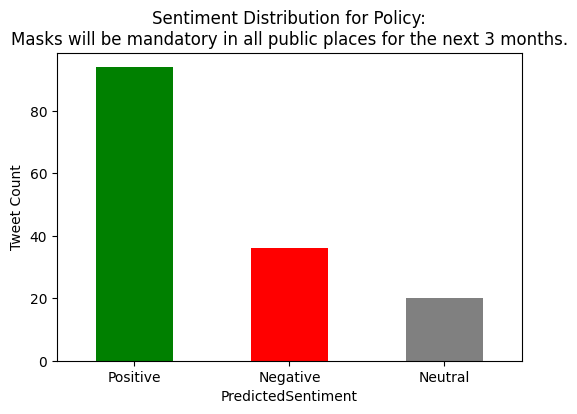


Sample relevant tweets with predicted sentiment:
                                         OriginalTweet PredictedSentiment
768  Non surgical Mask by to standard and specifica...           Positive
352  Happy faces in masks   making changes in way o...           Positive
180  Thread (3/n)\r\r\n\r\r\nI request @PMOIndia to...           Positive
320  The prices of masks and sanitizers are fixed b...            Neutral
5    shopkeepers who are selling mask at very highl...           Positive
387  For a Koel Aajeevika Apparel Park in the Palam...           Positive
492  @TelanganaCMO @TelanganaDGP @MinisterKTR @MoHF...           Positive
386  Chemists in Mumbai are selling masks as per th...           Positive
290  Also, masks and sanitisers are now sold only o...            Neutral
580  N95 MASK + SANITIZER COMBO\r\r\nPeople face sh...           Positive


In [ ]:
# (Extended): Policy Sentiment Decision System with Visualization

import pandas as pd
import torch
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# 1. Load cleaned dataset
df_india = pd.read_csv("covid19_india_cleaned.csv")
df_india["clean_text"] = df_india["clean_text"].fillna("").astype(str)

# 2. Load SBERT model (for similarity search)
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Precompute tweet embeddings
tweet_embeddings = sbert_model.encode(df_india["clean_text"].tolist(), convert_to_tensor=True)

# 3. Use fine-tuned COVID-Twitter-BERT from Cell 7.2
# (make sure `model`, `tokenizer`, and `predict_sentiment` are already defined)

def analyze_policy(policy_text, top_n=150, show_chart=True):
    """
    Analyze a policy:
    - SBERT finds relevant tweets
    - Fine-tuned BERT predicts sentiment
    - Aggregate sentiment + visualize + decision
    """
    # Encode policy
    policy_embedding = sbert_model.encode(policy_text, convert_to_tensor=True)

    # Find top_n most similar tweets
    cos_scores = util.cos_sim(policy_embedding, tweet_embeddings)[0]
    top_idx = torch.topk(cos_scores, k=top_n).indices.cpu().numpy()
    relevant_tweets = df_india.iloc[top_idx].copy()

    # Predict sentiment
    sentiments = [predict_sentiment(t) for t in relevant_tweets["clean_text"].tolist()]
    relevant_tweets["PredictedSentiment"] = sentiments

    # Sentiment counts
    counts = relevant_tweets["PredictedSentiment"].value_counts()
    print("\nSentiment counts among relevant tweets:")
    print(counts)

    # Decision logic
    if counts.get("Positive", 0) > counts.get("Negative", 0):
        decision = "✅ Policy is likely acceptable."
    else:
        decision = "⚠️ Policy may face resistance."

    print("\nFinal Decision:", decision)

    # Visualization
    if show_chart:
        counts.plot(kind="bar", color=["green","red","gray"], figsize=(6,4))
        plt.title(f"Sentiment Distribution for Policy:\n{policy_text}")
        plt.ylabel("Tweet Count")
        plt.xticks(rotation=0)
        plt.show()

    return relevant_tweets[["OriginalTweet", "PredictedSentiment"]].head(10)

# Example usage
policy = "Masks will be mandatory in all public places for the next 3 months."
results = analyze_policy(policy, top_n=150, show_chart=True)

print("\nSample relevant tweets with predicted sentiment:")
print(results)


In [ ]:
# improving

In [ ]:
# --------------------------------------------
# STEP 1: Clean and prepare Corona_NLP_train.csv
# --------------------------------------------

import pandas as pd
import re

# Load dataset
df = pd.read_csv("Corona_NLP_train.csv", encoding='latin1')

# Drop rows with missing values
df = df.dropna(subset=['OriginalTweet', 'Sentiment']).reset_index(drop=True)

# Normalize Sentiment labels (map 5 → 3 classes)
sentiment_map = {
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral",
    "Positive": "Positive",
    "Extremely Positive": "Positive"
}
df["Sentiment"] = df["Sentiment"].map(sentiment_map)

# Clean tweets
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)               # remove URLs
    text = re.sub(r'www\S+', '', text)                # remove www links
    text = re.sub(r'@\w+', '', text)                  # remove mentions
    text = re.sub(r'#\w+', '', text)                  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # keep only alphabets and spaces
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

df["clean_text"] = df["OriginalTweet"].apply(clean_tweet)

# Drop empty cleaned rows
df = df[df["clean_text"].str.strip() != ""]

# Save cleaned dataset
df.to_csv("covid19_cleaned_global.csv", index=False)
print("✅ Cleaned dataset saved as covid19_cleaned_global.csv")
print("Total rows after cleaning:", len(df))

# Quick check
df.head(10)


✅ Cleaned dataset saved as covid19_cleaned_global.csv
Total rows after cleaning: 41120


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,clean_text
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,me ready to go at supermarket during the outbr...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,as news of the regions first confirmed covid c...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,was at the supermarket today didnt buy toilet ...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,due to covid our retail store and classroom in...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,for corona preventionwe should stop to buy thi...


In [ ]:
#new idea ##########################

In [ ]:
pip install transformers datasets scikit-learn matplotlib torch accelerate


In [ ]:
pip install -U transformers


In [ ]:
# train_bert_only_trainset.py

import re
import os
import random
import numpy as np
import pandas as pd
import torch
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback,
)
from datasets import Dataset
from torch.nn import CrossEntropyLoss
import torch.nn.functional as F

# -------------------------
# 1. Basic Setup
# -------------------------
RANDOM_SEED = 42
MODEL_NAME = "bert-base-uncased"   # or "digitalepidemiologylab/covid-twitter-bert-v2"
MAX_LEN = 128
BATCH_SIZE = 16
EPOCHS = 5
OUTPUT_DIR = "./bert_train_only"
os.makedirs(OUTPUT_DIR, exist_ok=True)

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(RANDOM_SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# -------------------------
# 2. Clean Function
# -------------------------
def deep_clean(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z0-9\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

# -------------------------
# 3. Load TRAIN CSV only
# -------------------------
train_df = pd.read_csv("Corona_NLP_train.csv", encoding="ISO-8859-1")
TEXT_COL = "OriginalTweet"
LABEL_COL = "Sentiment"

train_df["clean_text"] = train_df[TEXT_COL].astype(str).apply(deep_clean)

# Map 5 → 3 sentiment classes
sentiment_map = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
train_df[LABEL_COL] = train_df[LABEL_COL].map(sentiment_map)
train_df = train_df.dropna(subset=[LABEL_COL]).reset_index(drop=True)

# Encode labels
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}
train_df["label"] = train_df[LABEL_COL].map(label2id).astype(int)

print("Training data distribution:")
print(train_df[LABEL_COL].value_counts())

# -------------------------
# 4. Prepare Dataset
# -------------------------
train_ds = Dataset.from_pandas(train_df[["clean_text", "label"]])
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

def tokenize_batch(batch):
    return tokenizer(batch["clean_text"], truncation=True, padding="max_length", max_length=MAX_LEN)

train_ds = train_ds.map(tokenize_batch, batched=True)
train_ds = train_ds.remove_columns(["clean_text"])
train_ds.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

# -------------------------
# 5. Load Model
# -------------------------
model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME, num_labels=3, id2label=id2label, label2id=label2id
).to(device)

# -------------------------
# 6. Handle Class Imbalance
# -------------------------
class_counts = train_df["label"].value_counts().sort_index().to_numpy()
weights = 1.0 / (class_counts + 1e-8)
weights = torch.tensor(weights / weights.sum(), dtype=torch.float).to(device)
print("Class weights:", weights.cpu().numpy())

# ✅ FIXED WeightedTrainer (compatible with num_items_in_batch argument)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Custom compute_loss that supports newer Trainer APIs with extra arguments like num_items_in_batch.
        """
        labels = inputs.get("labels").to(model.device)
        outputs = model(**{k: v.to(model.device) for k, v in inputs.items()})
        logits = outputs.logits
        loss_fct = CrossEntropyLoss(weight=weights)
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# -------------------------
# 7. TrainingArguments (final universal version)
# -------------------------
print("✔ Using simplified TrainingArguments for compatibility")

training_args = TrainingArguments(
    output_dir=OUTPUT_DIR,
    num_train_epochs=EPOCHS,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    do_eval=False,             # no evaluation since we’re only training
    save_steps=500,            # save every 500 steps
    logging_steps=100,         # log every 100 steps
    save_total_limit=2,        # keep only 2 checkpoints
    learning_rate=2e-5,
    seed=RANDOM_SEED,
    report_to="none"           # disable wandb/tensorboard
)

# -------------------------
# 8. Train the Model
# -------------------------
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_ds
)

print("\nStarting training...")
trainer.train()
print("\n✅ Training complete!")

# -------------------------
# 9. Save Model & Tokenizer
# -------------------------
save_dir = os.path.join(OUTPUT_DIR, "final_model")
trainer.save_model(save_dir)
tokenizer.save_pretrained(save_dir)
print(f"✅ Model and tokenizer saved to: {save_dir}")

# -------------------------
# 10. Quick Prediction Function
# -------------------------
def predict_text(text: str, topk=False):
    t = deep_clean(text)
    enc = tokenizer(t, return_tensors="pt", truncation=True, padding=True, max_length=MAX_LEN).to(device)
    model.eval()
    with torch.no_grad():
        out = model(**enc)
        probs = F.softmax(out.logits, dim=-1).cpu().numpy().flatten()
        pred_id = int(np.argmax(probs))
    if topk:
        return {id2label[i]: float(probs[i]) for i in range(len(probs))}
    return id2label[pred_id]

# Example prediction
print("\nExample prediction:")
print(predict_text("Lockdown has made life very difficult for everyone.", topk=True))


Using device: cuda
Training data distribution:
Sentiment
Positive    18046
Negative    15398
Neutral      7713
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/41157 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Class weights: [0.25976497 0.51858693 0.22164807]
✔ Using simplified TrainingArguments for compatibility

Starting training...


Step,Training Loss
100,1.065900
200,0.889700
300,0.740600
400,0.687800
500,0.631700
600,0.556400
700,0.550300
800,0.487800
900,0.524600
1000,0.452600



✅ Training complete!
✅ Model and tokenizer saved to: ./bert_train_only/final_model

Example prediction:
{'Negative': 0.9996509552001953, 'Neutral': 0.00021280194050632417, 'Positive': 0.0001361534814350307}


In [ ]:
print(predict_text("Wearing a mask is a good precaution for COVID.", topk=True))


{'Negative': 0.00010858063615160063, 'Neutral': 0.00024337672221008688, 'Positive': 0.9996480941772461}


In [ ]:
### ui

In [ ]:
!pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 113.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 127.0 MB/s eta 0:00:00


In [ ]:
!pip install streamlit pyngrok


In [ ]:
import streamlit as st
import torch
import torch.nn.functional as F
from transformers import BertTokenizerFast, BertForSequenceClassification
import re
import numpy as np

# ---------------------
# 1️⃣ Load fine-tuned model
# ---------------------
MODEL_PATH = "./bert_train_only/final_model"
model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = BertTokenizerFast.from_pretrained(MODEL_PATH)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ---------------------
# 2️⃣ Helper: clean text
# ---------------------
def deep_clean(text):
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"[^A-Za-z0-9\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

# ---------------------
# 3️⃣ Predict function
# ---------------------
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

def predict_policy_sentiment(text):
    clean_text = deep_clean(text)
    inputs = tokenizer(clean_text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1).cpu().numpy().flatten()

    pred_id = int(np.argmax(probs))
    sentiment = id2label[pred_id]
    conf = float(np.max(probs))
    return sentiment, conf, dict(zip(id2label.values(), probs))

# ---------------------
# 4️⃣ Streamlit UI
# ---------------------
st.set_page_config(page_title="COVID Policy Sentiment", page_icon="🧠", layout="centered")

st.title("🧠 COVID Policy Sentiment Analyzer")
st.write("Type any **policy statement** below to see how the public might perceive it:")

policy_text = st.text_area("✍️ Enter a policy statement:", height=120, placeholder="Example: Wearing masks is a good precaution for COVID.")

if st.button("🔍 Analyze Sentiment"):
    if not policy_text.strip():
        st.warning("Please enter a policy statement first.")
    else:
        with st.spinner("Analyzing..."):
            sentiment, conf, scores = predict_policy_sentiment(policy_text)

        st.markdown(f"### 🧩 Predicted Sentiment: **{sentiment}** (Confidence: {conf:.2%})")

        # ---------------------
        # 5️⃣ Decision logic
        # ---------------------
        if sentiment == "Positive":
            decision = "✅ Policy accepted by public."
        elif sentiment == "Neutral":
            decision = "⚠️ Improvements needed."
        else:
            decision = "❌ Policy may face resistance (need to change policy)."

        st.markdown(f"### 🏁 Final Decision: {decision}")

        st.markdown("#### 🔢 Sentiment Probabilities")
        st.json(scores)

st.markdown("---")
st.caption("Developed using fine-tuned BERT on COVID-19 tweet sentiment data.")


2025-10-21 15:20:29.092 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:20:29.100 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:20:30.182 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-21 15:20:30.187 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:20:30.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:20:30.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 15:20:30.203 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()

In [ ]:
!ngrok config add-authtoken 34A2O4BSZdYAbCGsJqijRrzkP4r_CRfRTyPsV7AQim8yVysH


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ls -la


total 10276
drwxr-xr-x 1 root root     4096 Oct 16 17:30 .
drwxr-xr-x 1 root root     4096 Oct 16 17:26 ..
drwxr-xr-x 5 root root     4096 Oct 16 18:48 bert_train_only
drwxr-xr-x 4 root root     4096 Oct 15 13:42 .config
-rw-r--r-- 1 root root 10500262 Oct 16 17:30 Corona_NLP_train.csv
drwxr-xr-x 1 root root     4096 Oct 15 13:42 sample_data


In [ ]:
%%bash
cat > policy_sentiment_app.py <<'PY'
import streamlit as st
import torch
import torch.nn.functional as F
from transformers import BertTokenizerFast, BertForSequenceClassification
import re
import numpy as np

# ---------------------
# 1️⃣ Load fine-tuned model
# ---------------------
MODEL_PATH = "./bert_train_only/final_model"
model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
tokenizer = BertTokenizerFast.from_pretrained(MODEL_PATH)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# ---------------------
# 2️⃣ Helper: clean text
# ---------------------
def deep_clean(text):
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"[^A-Za-z0-9\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

# ---------------------
# 3️⃣ Predict function
# ---------------------
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

def predict_policy_sentiment(text):
    clean_text = deep_clean(text)
    inputs = tokenizer(clean_text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1).cpu().numpy().flatten()

    pred_id = int(np.argmax(probs))
    sentiment = id2label[pred_id]
    conf = float(np.max(probs))
    return sentiment, conf, dict(zip(id2label.values(), probs))

# ---------------------
# 4️⃣ Streamlit UI
# ---------------------
st.set_page_config(page_title="COVID Policy Sentiment", page_icon="🧠", layout="centered")

st.title("🧠 COVID Policy Sentiment Analyzer")
st.write("Type any **policy statement** below to see how the public might perceive it:")

policy_text = st.text_area("✍️ Enter a policy statement:", height=120, placeholder="Example: Wearing masks is a good precaution for COVID.")

if st.button("🔍 Analyze Sentiment"):
    if not policy_text.strip():
        st.warning("Please enter a policy statement first.")
    else:
        with st.spinner("Analyzing..."):
            sentiment, conf, scores = predict_policy_sentiment(policy_text)

        st.markdown(f"### 🧩 Predicted Sentiment: **{sentiment}** (Confidence: {conf:.2%})")

        # ---------------------
        # 5️⃣ Decision logic
        # ---------------------
        if sentiment == "Positive":
            decision = "✅ Policy accepted by public."
        elif sentiment == "Neutral":
            decision = "⚠️ Improvements needed."
        else:
            decision = "❌ Policy may face resistance (need to change policy)."

        st.markdown(f"### 🏁 Final Decision: {decision}")

        st.markdown("#### 🔢 Sentiment Probabilities")
        st.json(scores)

st.markdown("---")
st.caption("Developed using fine-tuned BERT on COVID-19 tweet sentiment data.")
PY


In [ ]:
from pyngrok import ngrok
import subprocess, time, os

# Kill any previous tunnels or apps
ngrok.kill()
!fuser -k 8501/tcp || true

# Start Streamlit in background
process = subprocess.Popen(["streamlit", "run", "policy_sentiment_app.py", "--server.port", "8501"])

# Wait for it to start
time.sleep(8)

# Expose app via ngrok
public_url = ngrok.connect(8501)
print("🌐 Your Streamlit app is live at:")
print(public_url)


🌐 Your Streamlit app is live at:
NgrokTunnel: "https://visibly-microminiature-jaxen.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
## for final rev

In [ ]:
#  comparison with normal roberta

Using device: cuda
Loaded 3798 test samples.


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



📊 Model: Fine-tuned BERT
Accuracy: 0.9105 | Macro-F1: 0.8960
              precision    recall  f1-score   support

    Negative       0.93      0.91      0.92      1633
     Neutral       0.82      0.85      0.84       619
    Positive       0.93      0.93      0.93      1546

    accuracy                           0.91      3798
   macro avg       0.89      0.90      0.90      3798
weighted avg       0.91      0.91      0.91      3798


📊 Model: RoBERTa Base
Accuracy: 0.1630 | Macro-F1: 0.0934
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1633
     Neutral       0.16      1.00      0.28       619
    Positive       0.00      0.00      0.00      1546

    accuracy                           0.16      3798
   macro avg       0.05      0.33      0.09      3798
weighted avg       0.03      0.16      0.05      3798



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

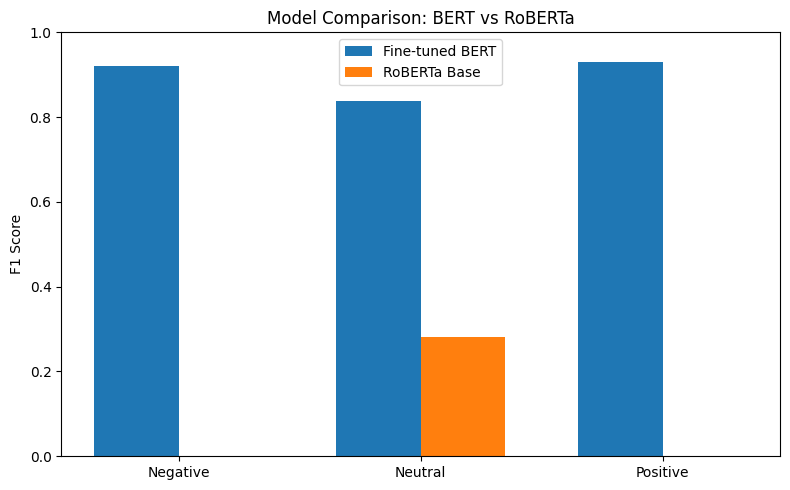


🔍 Summary Comparison:
             Model  Accuracy  Macro-F1
0  Fine-tuned BERT  0.910479  0.895984
1     RoBERTa Base  0.162981  0.093427


In [ ]:
# model_comparison_roberta.py

import torch
import torch.nn.functional as F
from transformers import BertTokenizerFast, BertForSequenceClassification, RobertaTokenizerFast, RobertaForSequenceClassification
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
import re

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ------------------------------
# 1. Helper: Text cleaning
# ------------------------------
def deep_clean(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\w+", " ", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z0-9\s']", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text.lower()

# ------------------------------
# 2. Load test dataset
# ------------------------------
test_df = pd.read_csv("/content/Corona_NLP_test.csv", encoding="ISO-8859-1")
test_df["clean_text"] = test_df["OriginalTweet"].astype(str).apply(deep_clean)

sentiment_map = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
label2id = {"Negative": 0, "Neutral": 1, "Positive": 2}
id2label = {v: k for k, v in label2id.items()}

test_df["Sentiment"] = test_df["Sentiment"].map(sentiment_map)
test_df["label"] = test_df["Sentiment"].map(label2id)
test_df = test_df.dropna(subset=["label"]).reset_index(drop=True)

print(f"Loaded {len(test_df)} test samples.")

# ------------------------------
# 3. Load your fine-tuned BERT
# ------------------------------
bert_path = "./bert_train_only/final_model"
bert_model = BertForSequenceClassification.from_pretrained(bert_path).to(device)
bert_tokenizer = BertTokenizerFast.from_pretrained(bert_path)
bert_model.eval()

# ------------------------------
# 4. Load baseline RoBERTa
# ------------------------------
roberta_model_name = "roberta-base"
roberta_model = RobertaForSequenceClassification.from_pretrained(roberta_model_name, num_labels=3).to(device)
roberta_tokenizer = RobertaTokenizerFast.from_pretrained(roberta_model_name)
roberta_model.eval()

# ------------------------------
# 5. Evaluation function
# ------------------------------
def evaluate_model(model, tokenizer, df, model_name):
    preds, true_labels = [], []
    for text, label in zip(df["clean_text"], df["label"]):
        enc = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128).to(device)
        with torch.no_grad():
            logits = model(**enc).logits
            probs = F.softmax(logits, dim=-1).cpu().numpy().flatten()
            pred_id = int(np.argmax(probs))
        preds.append(pred_id)
        true_labels.append(label)

    report = classification_report(true_labels, preds, target_names=["Negative", "Neutral", "Positive"], output_dict=True)
    acc = accuracy_score(true_labels, preds)
    f1_macro = f1_score(true_labels, preds, average="macro")

    print(f"\n📊 Model: {model_name}")
    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f}")
    print(classification_report(true_labels, preds, target_names=["Negative", "Neutral", "Positive"]))

    return report, acc, f1_macro

# ------------------------------
# 6. Run evaluations
# ------------------------------
bert_report, bert_acc, bert_f1 = evaluate_model(bert_model, bert_tokenizer, test_df, "Fine-tuned BERT")
roberta_report, roberta_acc, roberta_f1 = evaluate_model(roberta_model, roberta_tokenizer, test_df, "RoBERTa Base")

# ------------------------------
# 7. Compare results visually
# ------------------------------
labels = ["Negative", "Neutral", "Positive"]
bert_scores = [bert_report[l]["f1-score"] for l in labels]
roberta_scores = [roberta_report[l]["f1-score"] for l in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, bert_scores, width, label="Fine-tuned BERT")
plt.bar(x + width/2, roberta_scores, width, label="RoBERTa Base")
plt.title("Model Comparison: BERT vs RoBERTa")
plt.ylabel("F1 Score")
plt.xticks(x, labels)
plt.ylim(0,1)
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------
# 8. Summary Table
# ------------------------------
summary = pd.DataFrame({
    "Model": ["Fine-tuned BERT", "RoBERTa Base"],
    "Accuracy": [bert_acc, roberta_acc],
    "Macro-F1": [bert_f1, roberta_f1]
})
print("\n🔍 Summary Comparison:")
print(summary)


In [ ]:
## fine tuned roberta

In [ ]:
#### other comparison

In [ ]:
!pip install transformers datasets scikit-learn -q


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"
os.environ["WANDB_MODE"] = "offline"


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast, TrainingArguments, Trainer
import torch, numpy as np, re

# ----------- Data Load & Clean -------------
df = pd.read_csv("Corona_NLP_train.csv", encoding="ISO-8859-1")

df = df[["OriginalTweet", "Sentiment"]]
sentiment_map = {
    "Extremely Positive": "Positive",
    "Positive": "Positive",
    "Extremely Negative": "Negative",
    "Negative": "Negative",
    "Neutral": "Neutral"
}
df["Sentiment"] = df["Sentiment"].map(sentiment_map)

def clean(x):
    x = str(x)
    x = re.sub(r"http\S+|@\w+|[^A-Za-z0-9 ]", " ", x)
    return re.sub(r"\s+", " ", x).strip().lower()

df["clean"] = df["OriginalTweet"].apply(clean)

X_train, X_test, y_train, y_test = train_test_split(df["clean"], df["Sentiment"], test_size=0.2, random_state=42)

labels = {"Negative":0, "Neutral":1, "Positive":2}
inv = {v:k for k,v in labels.items()}

# ---------- TF-IDF + Logistic Regression ----------
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train_tfidf, y_train)

log_preds = logreg.predict(X_test_tfidf)
log_acc = accuracy_score(y_test, log_preds)
log_f1 = f1_score(y_test, log_preds, average="macro")
print("\nLogistic Regression Results:")
print("Accuracy:", log_acc, "Macro-F1:", log_f1)

# ---------- DistilBERT Fine-tuning ----------
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

train_enc = tokenizer(list(X_train), truncation=True, padding=True)
test_enc = tokenizer(list(X_test), truncation=True, padding=True)

class TorchDataset(torch.utils.data.Dataset):
    def __init__(self, enc, labels):
        self.enc = enc
        self.labels = [labels[y] for y in labels.keys()]

distil_train = [{"input_ids": train_enc["input_ids"][i],
                 "attention_mask": train_enc["attention_mask"][i],
                 "labels": torch.tensor(labels[y_train.iloc[i]])}
                for i in range(len(X_train))]

distil_test = [{"input_ids": test_enc["input_ids"][i],
                "attention_mask": test_enc["attention_mask"][i],
                "labels": torch.tensor(labels[y_test.iloc[i]])}
               for i in range(len(X_test))]

class HFDS(torch.utils.data.Dataset):
    def __init__(self, samples): self.samples=samples
    def __len__(self): return len(self.samples)
    def __getitem__(self,i): return self.samples[i]

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)

args = TrainingArguments(
    output_dir="./distilbert_eval",
    per_device_train_batch_size=8,
    num_train_epochs=2,
    logging_steps=50,
    save_strategy="no"
)

trainer = Trainer(model=model, args=args, train_dataset=HFDS(distil_train))
trainer.train()

# Evaluate
preds = trainer.predict(HFDS(distil_test)).predictions
preds = np.argmax(preds, axis=1)
distil_acc = accuracy_score([labels[y] for y in y_test], preds)
distil_f1 = f1_score([labels[y] for y in y_test], preds, average="macro")

print("\nDistilBERT Results:")
print("Accuracy:", distil_acc, "Macro-F1:", distil_f1)



Logistic Regression Results:
Accuracy: 0.7998056365403304 Macro-F1: 0.7791399884410856


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
50,1.018000
100,0.887800
150,0.842100
200,0.792300
250,0.695500
300,0.727100
350,0.713200
400,0.555900
450,0.686300
500,0.636900



DistilBERT Results:
Accuracy: 0.9173955296404276 Macro-F1: 0.9097459666544104


In [ ]:
## dataset visualization

✅ First 10 Rows:


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative



✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB
None

✅ Missing Values:
UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64


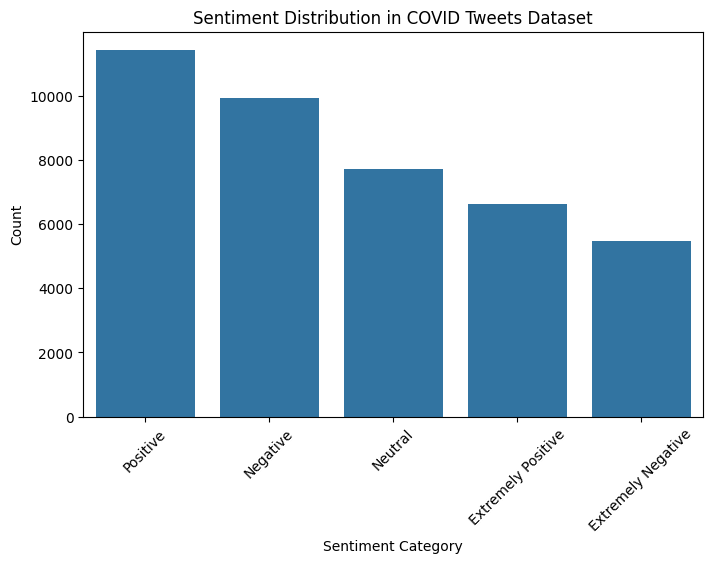

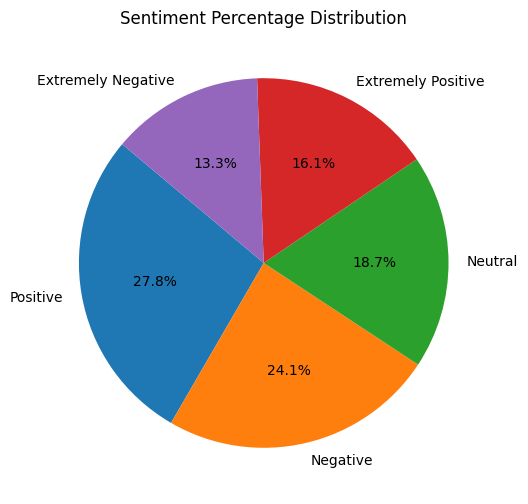

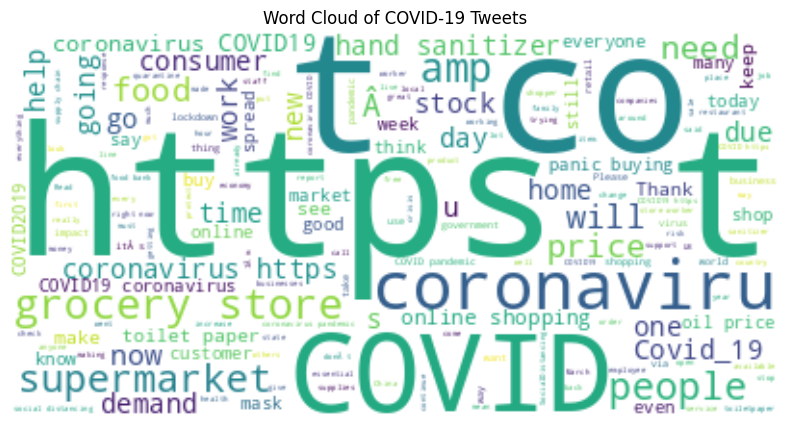

In [ ]:
# ✅ COVID-19 Tweets Dataset Visualization Script

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# -----------------------------
# Load Dataset
# -----------------------------
df = pd.read_csv("Corona_NLP_train.csv", encoding="ISO-8859-1")

# -----------------------------
# Preview Dataset
# -----------------------------
print("✅ First 10 Rows:")
display(df.head(10))

print("\n✅ Dataset Info:")
print(df.info())

print("\n✅ Missing Values:")
print(df.isnull().sum())

# -----------------------------
# Sentiment Distribution Bar Chart
# -----------------------------
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="Sentiment", order=df["Sentiment"].value_counts().index)
plt.title("Sentiment Distribution in COVID Tweets Dataset")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -----------------------------
# Sentiment Distribution Pie Chart
# -----------------------------
sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Sentiment Percentage Distribution")
plt.show()

# -----------------------------
# Word Cloud for Tweets
# -----------------------------
text = " ".join(str(tweet) for tweet in df["OriginalTweet"])

wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of COVID-19 Tweets")
plt.show()
